In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile = "scf.hdf5"
mf_lda = run_lda_he(scf_checkfile)
# ci_checkfile, mc = run_casci(scf_checkfile, ncas=4)

He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1


In [5]:
# Multi determinant boson new gradient
import importlib, bosonrecipes, bosonslater, bosonwftools
modules = [importlib, bosonrecipes, bosonslater, bosonwftools]
for m in modules:
    importlib.reload(m)

import importlib, slater, pyscftools,recipes, wftools, mc
modules = [importlib, slater, pyscftools,recipes, wftools, mc]
for m in modules:
    importlib.reload(m)


# import pyqmc.pyscftools as pyscftools

nconfig = 323
multi = False
if multi:
    mol, mf, mcc = pyscftools.recover_pyscf(scf_checkfile, ci_checkfile = ci_checkfile)
    target_root = 0
    if not hasattr(mcc.ci, "shape") or len(mcc.ci.shape) == 3:
        mcc.ci = mcc.ci[target_root]
else:
    mol, mf = pyscftools.recover_pyscf(scf_checkfile)
    mcc = None
    
wfb, to_opt = bosonwftools.generate_boson_wf(
        mol, mf, mc=mcc, jastrow=None, jastrow_kws=None, slater_kws=None
        )

wfs, to_opt = wftools.generate_wf(
        mol, mf, mc=mcc, jastrow=None, jastrow_kws=None, slater_kws=None
        )


In [6]:
wfs

In [14]:
wfb

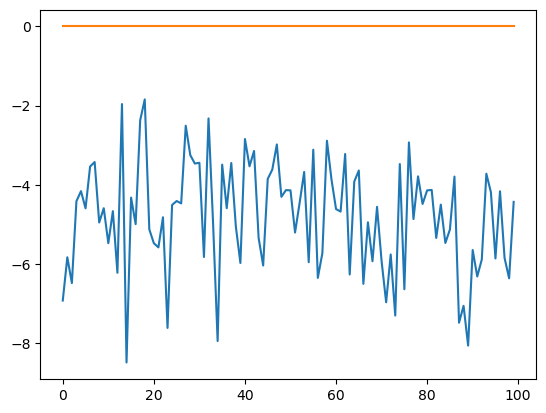

In [16]:
plt.plot(phib)
plt.plot(phib-phis)

In [17]:
e=0
gradb, valb, _ = wfb.gradient_value(e, configs.electron(e))
grads, vals, _ = wfs.gradient_value(e, configs.electron(e))

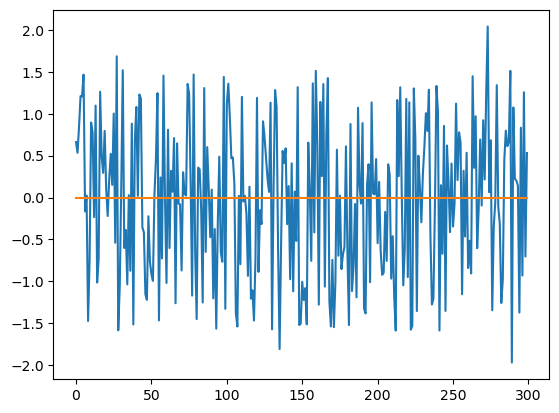

In [18]:
plt.plot(gradb.flatten())
plt.plot(gradb.flatten()-grads.flatten())

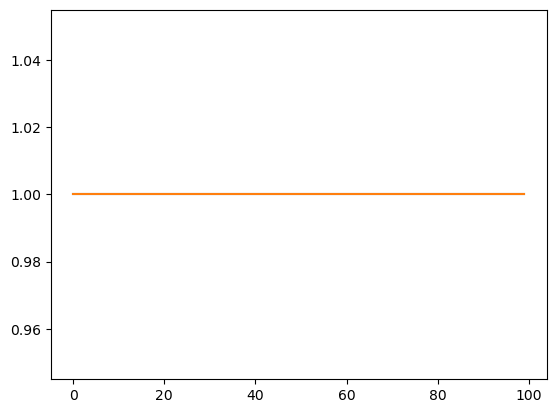

In [19]:
plt.plot(valb)
plt.plot(vals)

In [20]:
gradbr, _ = wfb.gradient_value_real(e, configs.electron(e))
gradbl, _, _ = wfb.gradient_value_log(e, configs.electron(e))

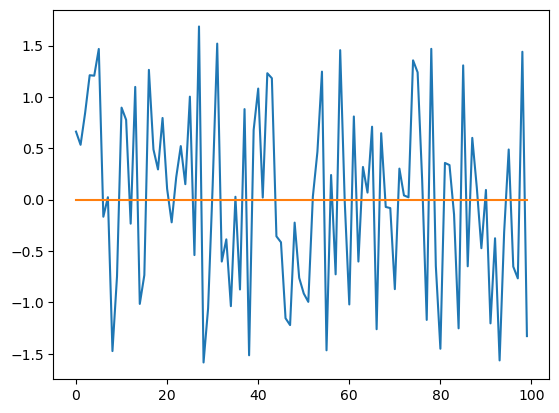

In [21]:
idx = 0
plt.plot(gradbl[idx])
plt.plot(gradbl[idx]-gradbr[idx]/np.exp(phib))